In [3]:
import psutil
import time
import csv

# Create a function to collect CPU and memory usage
def collect_data():
    cpu_usage = psutil.cpu_percent()
    memory_usage = psutil.virtual_memory().percent
    timestamp = int(time.time())
    return [timestamp, cpu_usage, memory_usage]

# Create an empty list to store the data
data = []

# Collect data every 5 seconds for 1 hour
for i in range(360):
    data.append(collect_data())
    time.sleep(5)

# Save the data to a CSV file
with open('cpu_memory_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['timestamp', 'cpu_utilization', 'memory_usage'])
    writer.writerows(data)


In [103]:
import pandas as pd
import numpy as np
df = pd.read_csv("cpu_memory_data.csv")

In [104]:
df

,timestamp,cpu_utilization,memory_usage
0,1683633162,2.4,81.8
1,1683633167,2.4,80.7
2,1683633172,1.6,81.2
3,1683633177,3.6,81.1
4,1683633182,5.7,80.7
...,...,...,...
355,1683634940,7.5,87.2
356,1683634945,3.0,83.8
357,1683634950,0.1,81.0
358,1683634955,7.9,84.7


In [105]:
df.head(20)

,timestamp,cpu_utilization,memory_usage
0,1683633162,2.40,81.8
1,1683633167,2.40,80.7
2,1683633172,1.60,81.2
3,1683633177,3.60,81.1
4,1683633182,5.70,80.7
5,1683633187,3.90,81.8
6,1683633192,0.90,97.0
7,1683633197,6.50,83.0
8,1683633202,2.40,73.8
9,1683633207,1.90,73.2


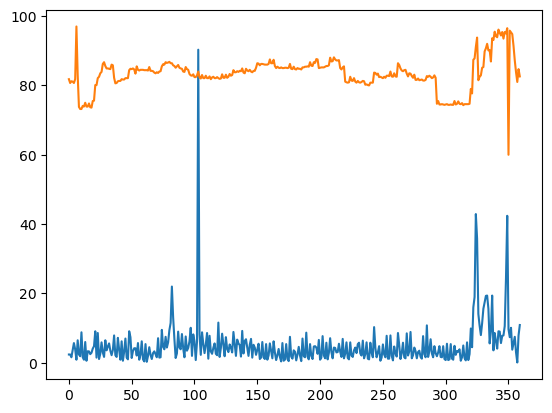

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt 



plt.plot(df['cpu_utilization'])
plt.plot(df['memory_usage'])

plt.show()

In [107]:
import csv
df = pd.read_csv("cpu_memory_data.csv")
  
# updating the column value/data
df.loc[357, 'cpu_utilization'] = 0.1
  
# writing into the file
df.to_csv("cpu_memory_data.csv", index=False)
  

In [29]:
df = pd.read_csv("cpu_memory_data.csv")
  
# updating the column value/data
df.loc[350,'memory_usage'] = 60

# writing into the file
df.to_csv("cpu_memory_data.csv", index=False)
  

In [94]:
df = pd.read_csv("cpu_memory_data.csv")
  
# updating the column value/data
df.loc[6,'memory_usage'] = 97

# writing into the file
df.to_csv("cpu_memory_data.csv", index=False)
  

In [59]:
df = pd.read_csv("cpu_memory_data.csv")
  
# updating the column value/data
df.loc[15, 'cpu_utilization'] = 3.34
  
# writing into the file
df.to_csv("cpu_memory_data.csv", index=False)

In [96]:
df.tail(10)

,timestamp,cpu_utilization,memory_usage
350,1683634915,9.7,60.0
351,1683634920,7.4,95.8
352,1683634925,10.1,95.3
353,1683634930,3.8,94.8
354,1683634935,5.6,91.4
355,1683634940,7.5,87.2
356,1683634945,3.0,83.8
357,1683634950,0.1,81.0
358,1683634955,7.9,84.7
359,1683634960,10.9,82.6


In [164]:
from sklearn.ensemble import IsolationForest
random_state = np.random.RandomState(10)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.035)
                      ,random_state=random_state)

model.fit(df[["timestamp","cpu_utilization","memory_usage"]])

print(model.get_params())

{'bootstrap': False, 'contamination': 0.035, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x1C3E298BA40, 'verbose': 0, 'warm_start': False}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [168]:

df['scores'] = model.decision_function(df[["timestamp","cpu_utilization","memory_usage"]])

df['anomaly_score'] = model.predict(df[["timestamp","cpu_utilization","memory_usage"]])

df[df['anomaly_score']==-1].head(13)

,timestamp,cpu_utilization,memory_usage,scores,anomaly_score
6,1683633192,0.9,97.0,-0.110435,-1
8,1683633202,2.4,73.8,-0.015144,-1
9,1683633207,1.9,73.2,-0.027657,-1
10,1683633212,8.8,73.2,-0.095596,-1
82,1683633573,22.0,86.4,-0.051525,-1
103,1683633678,90.3,84.0,-0.171946,-1
324,1683634784,42.9,91.1,-0.117727,-1
325,1683634789,35.8,93.8,-0.095101,-1
348,1683634905,24.4,95.0,-0.064522,-1
349,1683634910,42.4,96.5,-0.154280,-1


In [170]:
df[df['anomaly_score']==-1].count()

timestamp          13
cpu_utilization    13
memory_usage       13
scores             13
anomaly_score      13
dtype: int64